(This notebook is based on an interactive session on 2020-01-20, slightly cleaned up)

**NOTE: depends on having run `make run-noshows-resample` and `examples/privbayes-example-3-ensemble.py`**

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("../../synth-output/noshows-resampling")

In [3]:
df_orig = pd.read_csv("../../datasets/appointment_noshows/KaggleV2-May-2016-cleaned.csv")
df_resampled = pd.read_csv("synthetic_data_1.csv")
df_privbayes = pd.read_csv("../privbayes-example-3-ensemble-0000/synthetic_data_1.csv")

with open("utility_feature_importance.json") as f:
    feat_imp_resampled = json.load(f)
        
with open("utility_correlations.json") as f:
    corr_resampled = json.load(f)

    
with open('../privbayes-example-3-ensemble-0000/utility_feature_importance.json') as f:
    feat_imp_privbayes = json.load(f)

In [4]:
feat_imp_resampled.keys()

dict_keys(['rbo_0.6', 'rbo_0.8', 'rbo_ext_0.6', 'rbo_ext_0.8', 'l2_norm', 'kl_orig_rlsd', 'orig_feature_importances', 'rlsd_feature_importances'])

In [5]:
feat_imp_resampled['rbo_0.6']

0.9907690826090484

In [6]:
feat_imp_resampled['rbo_0.8']

0.9707062679171069

In [7]:
feat_imp_resampled['orig_feature_importances'][0:10]

[[0.11723295321075733, 'ages.COUNT(my_entity_id)'],
 [0.11556964903863316, 'age'],
 [0.08482538385692429, 'locations.COUNT(my_entity_id)'],
 [0.08018116234722271, 'DAY(appointment_day)'],
 [0.0538208669690111, 'genders.COUNT(my_entity_id)'],
 [0.04775543399670052, 'WEEKDAY(appointment_day)'],
 [0.04271568777777663,
  'genders.PERCENT_TRUE(my_entity_id.IS_WEEKEND(scheduled_time))'],
 [0.03895157068829188, 'patients.DAY(first_my_entity_id_time)'],
 [0.028914002721848263, 'DAY(scheduled_time)'],
 [0.025662848434760344, 'patients.WEEKDAY(first_my_entity_id_time)']]

In [8]:
feat_imp_resampled['rlsd_feature_importances'][0:10]

[[0.09956488718549433, 'ages.COUNT(my_entity_id)'],
 [0.09477841776321413, 'age'],
 [0.08224801596996274, 'locations.COUNT(my_entity_id)'],
 [0.06970547740674742, 'DAY(appointment_day)'],
 [0.050545718585384224, 'genders.COUNT(my_entity_id)'],
 [0.05032660237238205, 'patients.DAY(first_my_entity_id_time)'],
 [0.0488700782536517,
  'genders.PERCENT_TRUE(my_entity_id.IS_WEEKEND(scheduled_time))'],
 [0.04377689012468927, 'WEEKDAY(appointment_day)'],
 [0.03239031316621491, 'patients.COUNT(my_entity_id)'],
 [0.031489561726745434, 'patients.WEEKDAY(first_my_entity_id_time)']]

In [9]:
feat_imp_privbayes['rlsd_feature_importances'][0:10]

[[0.7229996366293611, 'age'],
 [0.03360703226522592, 'F'],
 [0.03341695718621019, 'sms_received'],
 [0.020616248881085816, 'patients.scholarship'],
 [0.01495608772540055, 'patients.diabetes'],
 [0.012272885912377279, 'patients.alcoholism'],
 [0.011924965039604031, 'patients.handicap'],
 [0.00659885300399509, 'patients.hypertension'],
 [0.003708173616971407, 'MARIA ORTIZ'],
 [0.0034135112880350417, 'RESISTÊNCIA']]

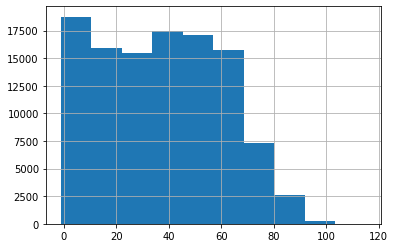

In [10]:
df_orig['age'].hist()

In [11]:
df_orig['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

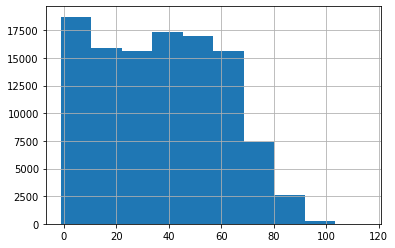

In [12]:
df_resampled['age'].hist()

In [13]:
df_resampled['no_show'].value_counts()

No     88459
Yes    22068
Name: no_show, dtype: int64

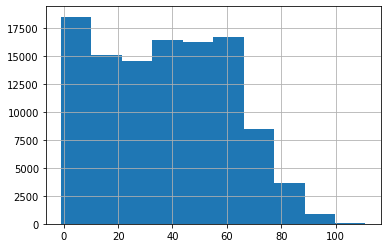

In [14]:
df_privbayes['age'].hist()

In [15]:
df_privbayes['no_show'].value_counts()

No     88330
Yes    22197
Name: no_show, dtype: int64

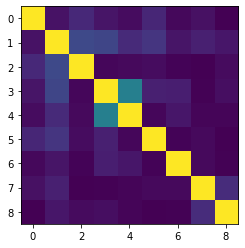

In [16]:
plt.imshow(corr_resampled['Cramers_V_Original'])

With independently resampled columns:


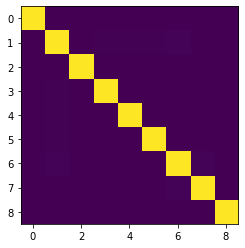

In [17]:
plt.imshow(corr_resampled['Cramers_V_Released'])

In [18]:
corr_resampled['Correlation_Ratio_Original']

[[0.10643955694750405],
 [0.18846546516765852],
 [0.09245715318943556],
 [0.5045862526245813],
 [0.2923914636780806],
 [0.09581128208216852],
 [0.08430542187295069],
 [0.012643416839989837],
 [0.060318511409173735]]

In [19]:
corr_resampled['Correlation_Ratio_Released']

[[0.0014201290557094277],
 [0.028899194130309724],
 [0.0015957171684851015],
 [0.004335791404261924],
 [0.001077152766748358],
 [0.0024023082608458876],
 [0.006386759153650465],
 [7.210537035455014e-05],
 [0.004703769850583551]]

The classifier-based metrics perform very badly.  The below is consistent with predictions of constant 'noshow = False' for both the original and synthetic data.

In [20]:
with open('utility_overall_diff.json') as f:
    overall_diff = json.load(f)

with open('utility_o_o.json') as f:
    o_o = json.load(f)
    
with open('utility_r_o.json') as f:
    r_o = json.load(f)
    
with open('utility_confusion_o_o.json') as f:
    overall_diff = json.load(f)

In [21]:
overall_diff

{'LogisticRegression': {'conf_matrix': [[17638, 0], [4468, 0]],
  'target_names': ['No', 'Yes']}}

In [22]:
o_o

{'LogisticRegression': {'accuracy': {'value': 79.78829277119334},
  'precision': {'macro': 50.0, 'weighted': 100.0},
  'recall': {'macro': 89.89414638559667, 'weighted': 79.78829277119334},
  'f1': {'macro': 44.379025764895324, 'weighted': 88.75805152979065}}}

In [23]:
r_o

{'LogisticRegression': {'accuracy': {'value': 79.78829277119334},
  'precision': {'macro': 50.0, 'weighted': 100.0},
  'recall': {'macro': 89.89414638559667, 'weighted': 79.78829277119334},
  'f1': {'macro': 44.379025764895324, 'weighted': 88.75805152979065}}}

In [24]:
overall_diff

{'LogisticRegression': {'conf_matrix': [[17638, 0], [4468, 0]],
  'target_names': ['No', 'Yes']}}